<a href="https://colab.research.google.com/github/blaisely/classification_exercises/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame = False)

In [205]:
X,y  = mnist.data, mnist.target
y.shape

(70000,)

In [122]:
test_image = X[0].copy()

In [123]:
test_image

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

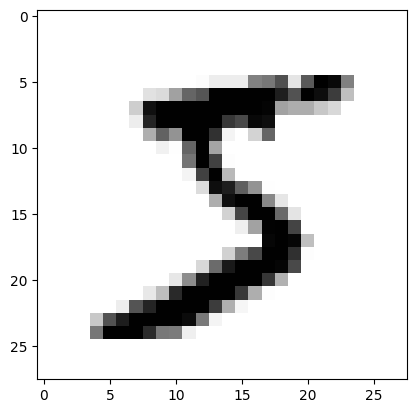

In [124]:
import matplotlib.pyplot as plt
img = test_image.reshape(28,28)
plt.imshow(img, cmap='binary')
plt.show()

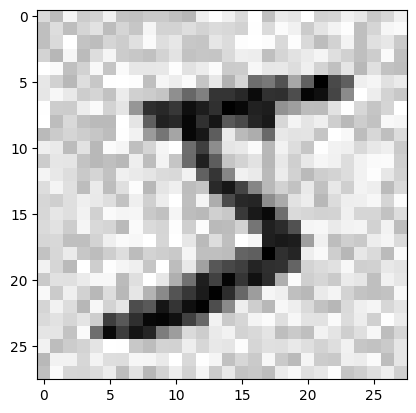

In [125]:
import numpy as np
from scipy.stats import randint
np.random.seed(42)
noise  = np.full(784,0)
noise =np.random.randint(0,100,784)
noise_image  = test_image + noise
img = noise_image.reshape(28,28)
plt.imshow(img, cmap='binary')
plt.show()

In [126]:
len(img)

28

In [129]:
img = test_image.reshape(28,28)

In [146]:
shifted_image = np.roll(img,shift=1,axis=1)

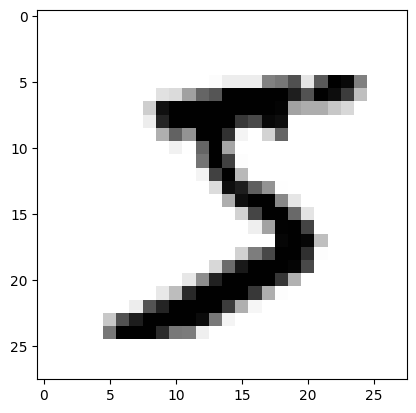

In [147]:
plt.imshow(shifted_image, cmap='binary')
plt.show()

In [176]:
new_array = np.hstack((img.flatten(),shifted_image.flatten()))

In [181]:
arr = X[:5,:].copy()

In [182]:
arr.shape

(5, 784)

In [200]:
s = arr[1].copy()
s.shape
s = s.reshape(1,-1)

In [201]:
new_array = np.concatenate((arr,s))

In [202]:
new_array.shape

(6, 784)

In [264]:
from scipy.ndimage import shift
def copy_and_shift(x,dx,dy):
  x = x.reshape(28,28)
  shifted_image = shift(x,[dx,dy],cval=0, mode='constant')
  return shifted_image.reshape([-1])

In [261]:
def augment_data(X,y):
  augmented_data = [image for image in X]
  augmented_labels = [label for label in y]
  for image, label in zip(X,y):
    for dx,dy in (-1,0),(1,0),(0,1),(0,-1):
      augmented_data.append(copy_and_shift(image,dx,dy))
      augmented_labels.append(label)
  return np.array(augmented_data),np.array(augmented_labels)

In [253]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X,y):
  X_train, y_train = X[train_index], y[train_index]
  X_test, y_test = X[test_index], y[test_index]

In [265]:
new_X, new_y = augment_data(X_train,y_train)

In [267]:
new_y.shape

(280000,)

In [268]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn_clf.fit(new_X,new_y)


KNeighborsClassifier(n_neighbors=6, weights='distance')

In [270]:
predictions = knn_clf.predict(X_test)

In [271]:
from sklearn.metrics import accuracy_score,recall_score
accuracy_score(y_test,predictions)

0.9797142857142858